## ■ 3장. 판다스로 데이터를 불러오는 방법


* 외부 파일 불러오기

| 파일포맷 |   reader   |  writer  |
|:--------:|:----------:|:--------:|
|    csv   |  read_csv  |  to_csv  |
|   json   |  read_json |  to_json |
|   html   |  read_html |  to_html |
|   Excel  | read_excel | to_excel |
|    sql   |  read_sql  |  to_sql  |

## ■ 3.1 read_csv로 데이터 프레임 구현하기

* #### 문법 : df = pd.read_csv(file_path, 옵션)

| read_csv 옵션 |                                                         설명                                                         |
|:-------------:|:--------------------------------------------------------------------------------------------------------------------:|
|      path     |                                                   파일의 위치, url                                                   |
|      sep      |                                        텍스트 데이터를 필드별로 구분하는 문자                                        |
|     header    | 열 이름으로 사용될 행의 번호(기본값은 0) header가 없고 첫 행부터 데이터가 잇는 경우 header = None으로 지정하면 된다. |
|   index_col   |                                          행 인덱스로 사용할 문자열의 리스트                                          |
|     names     |                                          열 이름으로 사용할 문자열의 리스트                                          |
| skiprows      | 처음 몇줄을 skip 할 것인지 설정                                                                                      |
| skip_footer   | 마지막 몇줄을 skip 할 것인지 설정                                                                                    |
| encoding      | 텍스트 인코딩 종류를 지정(예:'utf-8')                                                                                |


#### ※ 파이썬에서 한글이 깨지지 않으려면 encoding='utf-8'로 지정해야합니다.

## 예제: 실습파일을 내려받으세요~

In [4]:
import pandas as pd

df1 = pd.read_csv("d:\\data\\pandas\\read_csv_sample.csv", header=0)
print(df1, end = '\n\n')

df2 = pd.read_csv("d:\\data\\pandas\\read_csv_sample.csv", header=None)
print(df2)

   c0  c1  c2  c3
0   0   1   4   7
1   1   2   5   8
2   2   3   6   9

    0   1   2   3
0  c0  c1  c2  c3
1   0   1   4   7
2   1   2   5   8
3   2   3   6   9


### * index_col='co'를 옵션을 지정해서 데이터를 불러오기

In [7]:
import pandas as pd
df2 = pd.read_csv("d:\\data\\pandas\\read_csv_sample.csv", index_col='c0')
print(df2)

    c1  c2  c3
c0            
0    1   4   7
1    2   5   8
2    3   6   9


## 문제38. 타이타닉 데이터를 read_csv로 불러오는데 Survived 칼럼이 인덱스가 되게 하고 인덱스를 이용하여 생존자만 검색하시오~

In [12]:
import pandas as pd
tat = pd.read_csv("d:\\data\\train.csv", index_col='Survived')
print(tat.columns)
print(tat.loc[1]) # 인덱스 검색(행을 검색) ---> loc

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
          PassengerId  Pclass  \
Survived                        
1                   2       1   
1                   3       3   
1                   4       1   
1                   9       3   
1                  10       2   
...               ...     ...   
1                 876       3   
1                 880       1   
1                 881       2   
1                 888       1   
1                 890       1   

                                                       Name     Sex   Age  \
Survived                                                                    
1         Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
1                                    Heikkinen, Miss. Laina  female  26.0   
1              Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
1         Johnson, Mrs. Oscar W (Elisabeth V

## 문제39. 타이타닉 전체 데이터는 몇건이고 그중 생존자는 몇명인가?

In [18]:
import pandas as pd
tat = pd.read_csv("d:\\data\\train.csv")
print(tat, end = '\n\n')
print(len(tat)) # len을 이용하여 전체 건수(행의 수 = 인덱스 수)를 구할 수 있다.
tat = pd.read_csv("d:\\data\\train.csv", index_col = "Survived")
print(len(tat.loc[1]))

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

## ■ 3.2 엑셀 데이터를 파이썬으로 불러오는 방법

__문법 :__ pandas.read_excel('파일 경로 이름')

__게시판 머신러닝 수업 실습 파일__ ---> 남북한발전전력량.xlsx

In [21]:
import pandas as pd
df1 = pd.read_excel("d:\\data\\pandas\\남북한발전전력량.xlsx", header=0)
print(df1, end = '\n\n')

df2 = pd.read_excel("d:\\data\\pandas\\남북한발전전력량.xlsx", header=None)
print(df2) # 컬럼명이 0,1,2 ... 로 출력됨

  전력량 (억㎾h) 발전 전력별  1990  1991  1992  1993  1994  1995  1996  1997  ...  2007  \
0        남한     합계  1077  1186  1310  1444  1650  1847  2055  2244  ...  4031   
1       NaN     수력    64    51    49    60    41    55    52    54  ...    50   
2       NaN     화력   484   573   696   803  1022  1122  1264  1420  ...  2551   
3       NaN    원자력   529   563   565   581   587   670   739   771  ...  1429   
4       NaN    신재생     -     -     -     -     -     -     -     -  ...     -   
5        북한     합계   277   263   247   221   231   230   213   193  ...   236   
6       NaN     수력   156   150   142   133   138   142   125   107  ...   133   
7       NaN     화력   121   113   105    88    93    88    88    86  ...   103   
8       NaN    원자력     -     -     -     -     -     -     -     -  ...     -   

   2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  4224  4336  4747  4969  5096  5171  5220  5281  5404  
1    56    56    65    78    77    84    78    58    66  
2  2658  2802  

## ■ 3.3 json 파일을 불러오는 방법

json 파일은 데이터 공유를 목적으로 개발된 특수한 파일 형식이다.  
파이썬 딕셔너리와 비슷하게 __"key-value" 구조__를 갖는다.  

In [ ]:
import pandas as pd
df = pd.read_json("d:\\data\\pandas\\경기도행정구역경계.json")
print(df)
print(df.index)
print(df.values)

In [27]:
import pandas as pd

df1 = pd.read_json("d:\\data\\pandas\\read_json_sample.json")
print(df1, end = '\n\n\n')
print(df1.index)
print(df1.values)

           name  year        developer opensource
pandas           2008    Wes Mckinneye       True
NumPy            2006  Travis Oliphant       True
matplotlib       2003   John D. Hunter       True


Index(['pandas', 'NumPy', 'matplotlib'], dtype='object')
[['' 2008 'Wes Mckinneye' 'True']
 ['' 2006 'Travis Oliphant' 'True']
 ['' 2003 'John D. Hunter' 'True']]


### ※ 공공 데이터 포털에서 excel 또는 json파일을 내려받을 수 있다.(활용)

## ■ 3.4 html 파일을 파이썬으로 불러오는 방법

__샘플 데이터 :__ sample.html

In [30]:
import pandas as pd

url = "d:\\data\\pandas\\sample.html"
tables = pd.read_html(url)
print(tables)

[   Unnamed: 0  c0  c1  c2  c3
0           0   0   1   4   7
1           1   1   2   5   8
2           2   2   3   6   9,          name  year        developer  opensource
0       NumPy  2006  Travis Oliphant        True
1  matplotlib  2003   John D. Hunter        True
2      pandas  2008    Wes Mckinneye        True]


## 문제40. 위의 리스트에 담겨있는 요소들을 하나씩 뽑아서 출력하시오!

In [33]:
import pandas as pd

url = "d:\\data\\pandas\\sample.html"
tables = pd.read_html(url)
print(tables[0], end = '\n\n\n')
print(tables[1])

   Unnamed: 0  c0  c1  c2  c3
0           0   0   1   4   7
1           1   1   2   5   8
2           2   2   3   6   9


         name  year        developer  opensource
0       NumPy  2006  Travis Oliphant        True
1  matplotlib  2003   John D. Hunter        True
2      pandas  2008    Wes Mckinneye        True


## ■ 3.5 판다스 데이터 프레임을 csv파일로 저장하기

__문법 :__ 판다스 데이터프레임.to_csv("csv 파일의 위치와 이름")

In [34]:
import pandas as pd
emp = pd.read_csv("d:\\data\\emp.csv")
print(emp)

    empno   ename        job     mgr    hiredate   sal    comm  deptno
0    7839    KING  PRESIDENT     NaN  1981-11-17  5000     NaN      10
1    7698   BLAKE    MANAGER  7839.0  1981-05-01  2850     NaN      30
2    7782   CLARK    MANAGER  7839.0  1981-05-09  2450     NaN      10
3    7566   JONES    MANAGER  7839.0  1981-04-01  2975     NaN      20
4    7654  MARTIN   SALESMAN  7698.0  1981-09-10  1250  1400.0      30
5    7499   ALLEN   SALESMAN  7698.0  1981-02-11  1600   300.0      30
6    7844  TURNER   SALESMAN  7698.0  1981-08-21  1500     0.0      30
7    7900   JAMES      CLERK  7698.0  1981-12-11   950     NaN      30
8    7521    WARD   SALESMAN  7698.0  1981-02-23  1250   500.0      30
9    7902    FORD    ANALYST  7566.0  1981-12-11  3000     NaN      20
10   7369   SMITH      CLERK  7902.0  1980-12-09   800     NaN      20
11   7788   SCOTT    ANALYST  7566.0  1982-12-22  3000     NaN      20
12   7876   ADAMS      CLERK  7788.0  1983-01-15  1100     NaN      20
13   7

In [35]:
import pandas as pd
emp = pd.read_csv("d:\\data\\emp.csv")
print(emp)
emp.to_csv("d:\\data\\emp2.csv")

    empno   ename        job     mgr    hiredate   sal    comm  deptno
0    7839    KING  PRESIDENT     NaN  1981-11-17  5000     NaN      10
1    7698   BLAKE    MANAGER  7839.0  1981-05-01  2850     NaN      30
2    7782   CLARK    MANAGER  7839.0  1981-05-09  2450     NaN      10
3    7566   JONES    MANAGER  7839.0  1981-04-01  2975     NaN      20
4    7654  MARTIN   SALESMAN  7698.0  1981-09-10  1250  1400.0      30
5    7499   ALLEN   SALESMAN  7698.0  1981-02-11  1600   300.0      30
6    7844  TURNER   SALESMAN  7698.0  1981-08-21  1500     0.0      30
7    7900   JAMES      CLERK  7698.0  1981-12-11   950     NaN      30
8    7521    WARD   SALESMAN  7698.0  1981-02-23  1250   500.0      30
9    7902    FORD    ANALYST  7566.0  1981-12-11  3000     NaN      20
10   7369   SMITH      CLERK  7902.0  1980-12-09   800     NaN      20
11   7788   SCOTT    ANALYST  7566.0  1982-12-22  3000     NaN      20
12   7876   ADAMS      CLERK  7788.0  1983-01-15  1100     NaN      20
13   7

## 문제41. 타이타닉 데이터에서 생존자 데이터만 따로 tat_1.csv로 저장하시오.

In [42]:
import pandas as pd

tat = pd.read_csv("d:\\data\\train.csv", index_col= 'Survived')

print(tat.loc[1])

tat.loc[1].to_csv("d:\\data\\tat_1.csv")

          PassengerId  Pclass  \
Survived                        
1                   2       1   
1                   3       3   
1                   4       1   
1                   9       3   
1                  10       2   
...               ...     ...   
1                 876       3   
1                 880       1   
1                 881       2   
1                 888       1   
1                 890       1   

                                                       Name     Sex   Age  \
Survived                                                                    
1         Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
1                                    Heikkinen, Miss. Laina  female  26.0   
1              Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
1         Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0   
1                       Nasser, Mrs. Nicholas (Adele Achem)  female  14.0   
...                            

## ■ 3.6 판다스 데이터 프레임은 excel 파일로 저장하기

In [46]:
import pandas as pd

emp = pd.read_csv("d:\\data\\emp.csv")
print(emp, end = '\n\n') # 변경전 

emp.set_index("empno", inplace = True)
print(emp) # 변경후

    empno   ename        job     mgr    hiredate   sal    comm  deptno
0    7839    KING  PRESIDENT     NaN  1981-11-17  5000     NaN      10
1    7698   BLAKE    MANAGER  7839.0  1981-05-01  2850     NaN      30
2    7782   CLARK    MANAGER  7839.0  1981-05-09  2450     NaN      10
3    7566   JONES    MANAGER  7839.0  1981-04-01  2975     NaN      20
4    7654  MARTIN   SALESMAN  7698.0  1981-09-10  1250  1400.0      30
5    7499   ALLEN   SALESMAN  7698.0  1981-02-11  1600   300.0      30
6    7844  TURNER   SALESMAN  7698.0  1981-08-21  1500     0.0      30
7    7900   JAMES      CLERK  7698.0  1981-12-11   950     NaN      30
8    7521    WARD   SALESMAN  7698.0  1981-02-23  1250   500.0      30
9    7902    FORD    ANALYST  7566.0  1981-12-11  3000     NaN      20
10   7369   SMITH      CLERK  7902.0  1980-12-09   800     NaN      20
11   7788   SCOTT    ANALYST  7566.0  1982-12-22  3000     NaN      20
12   7876   ADAMS      CLERK  7788.0  1983-01-15  1100     NaN      20
13   7

## 문제42. 위의 emp 데이터 프레임을 emp.xlsx 파일로 내리시오~

In [50]:
import pandas as pd
emp = pd.read_csv("d:\\data\\emp.csv")
emp.to_excel("d:\\data\\emp.xlsx")

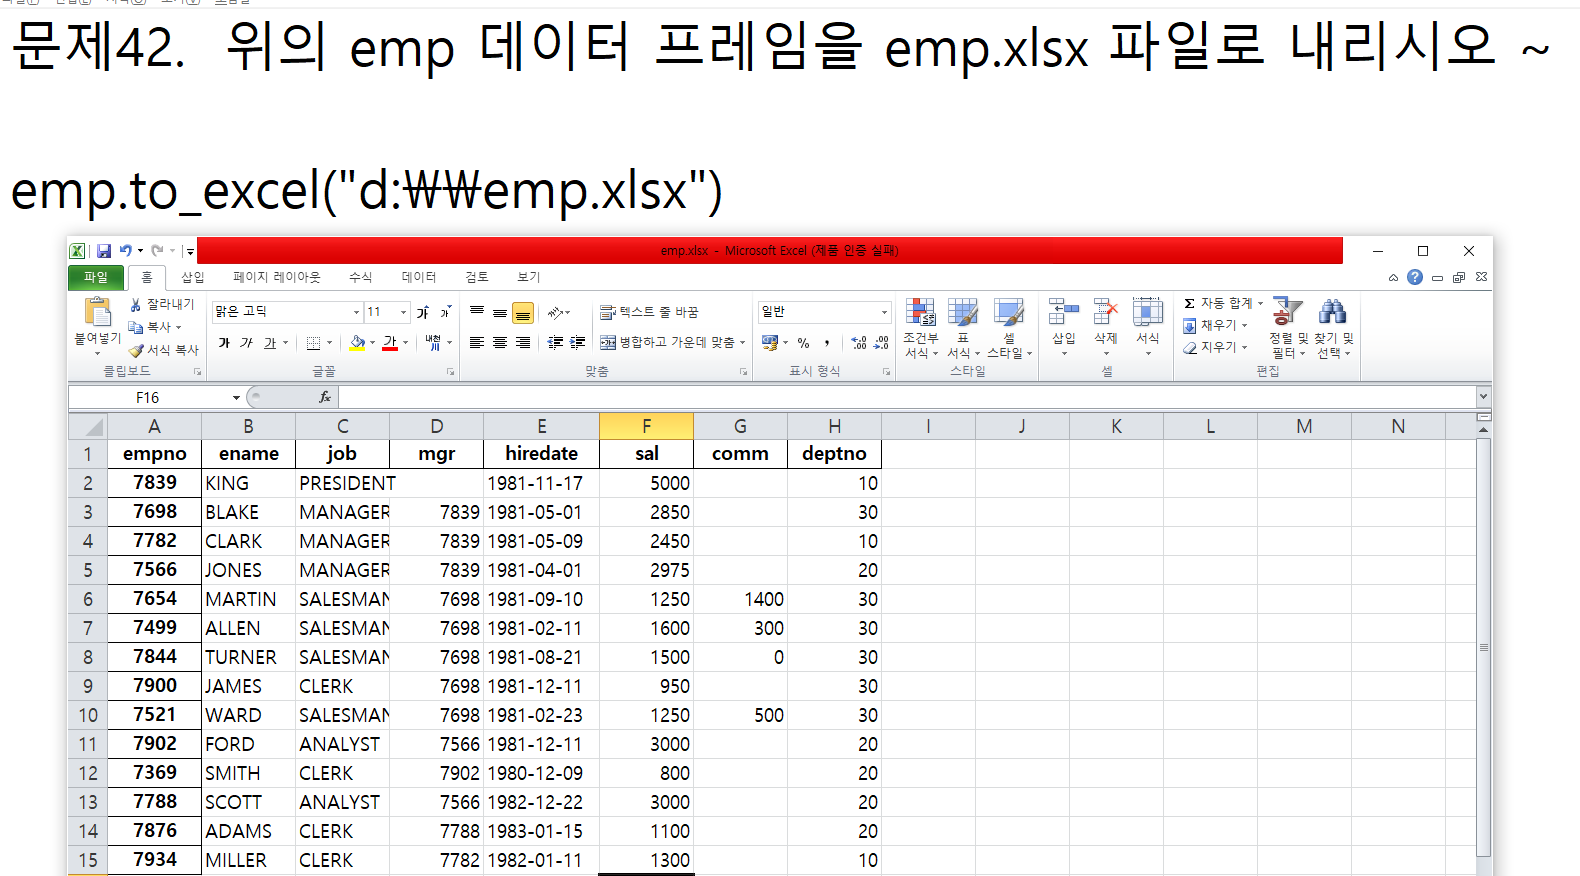

### ※ 그래프 그리기 

1. R (시각화가 예쁘다.)

2. Python

## 문제43. emp 데이터 프레임은 excel 파일의 sheet1에 저장하고 dept 데이터 프레임은 같은 excel 파일의 sheet2에 저장하시오!

In [54]:
import pandas as pd

emp = pd.read_csv("d:\\data\\emp.csv")
dept = pd.read_csv("d:\\data\\dept.csv")
print(dept)

writer = pd.ExcelWriter("d:\\data\\emp_dept.xlsx")
emp.to_excel(writer, sheet_name="sheet1")
dept.to_excel(writer, sheet_name="sheet2")
writer.save()

   deptno       dname       loc
0      10  ACCOUNTING  NEW YORK
1      20    RESEARCH    DALLAS
2      30       SALES   CHICAGO
3      40  OPERATIONS    BOSTON


## ■ 4장. 데이터 살펴보기

## ■ 4.1 데이터 프레임의 내용과 자료형 확인하기.

1. head() : 처음 5개의 행을 확인
2. tail() : 마지막 5개의 행을 확인
3. shape() : 데이터 프레임의 행과 열을 확인
4. dtypes() : 데이터 프레임의 자료형을 확인
5. describe() : 데이터 프레임의 기술통계정보 확인

## 문제44. emp 데이터 프레임의 위의 5개의 행과 아래의 5개의 행을 확인하시오!

In [59]:
import pandas as pd
emp = pd.read_csv("d:\\data\\emp.csv")

print(emp.head(), end = '\n\n')
print(emp.tail())

   empno   ename        job     mgr    hiredate   sal    comm  deptno
0   7839    KING  PRESIDENT     NaN  1981-11-17  5000     NaN      10
1   7698   BLAKE    MANAGER  7839.0  1981-05-01  2850     NaN      30
2   7782   CLARK    MANAGER  7839.0  1981-05-09  2450     NaN      10
3   7566   JONES    MANAGER  7839.0  1981-04-01  2975     NaN      20
4   7654  MARTIN   SALESMAN  7698.0  1981-09-10  1250  1400.0      30

    empno   ename      job     mgr    hiredate   sal  comm  deptno
9    7902    FORD  ANALYST  7566.0  1981-12-11  3000   NaN      20
10   7369   SMITH    CLERK  7902.0  1980-12-09   800   NaN      20
11   7788   SCOTT  ANALYST  7566.0  1982-12-22  3000   NaN      20
12   7876   ADAMS    CLERK  7788.0  1983-01-15  1100   NaN      20
13   7934  MILLER    CLERK  7782.0  1982-01-11  1300   NaN      10


## 문제45. emp 데이터 프레임의 컬럼들의 자료형을 확인하시오!

In [60]:
import pandas as pd
emp = pd.read_csv("d:\\data\\emp.csv")

print(emp.dtypes)

empno         int64
ename        object
job          object
mgr         float64
hiredate     object
sal           int64
comm        float64
deptno        int64
dtype: object


## 문제46. emp 테이블의 기술 통계정보를 확인하시오!

In [62]:
import pandas as pd
emp = pd.read_csv("d:\\data\\emp.csv")

print(emp.describe())

             empno          mgr          sal         comm     deptno
count    14.000000    13.000000    14.000000     4.000000  14.000000
mean   7726.571429  7739.307692  2073.214286   550.000000  22.142857
std     178.294361   103.714660  1182.503224   602.771377   8.017837
min    7369.000000  7566.000000   800.000000     0.000000  10.000000
25%    7588.000000  7698.000000  1250.000000   225.000000  20.000000
50%    7785.000000  7698.000000  1550.000000   400.000000  20.000000
75%    7868.000000  7839.000000  2943.750000   725.000000  30.000000
max    7934.000000  7902.000000  5000.000000  1400.000000  30.000000


In [ ]:
# R로 확인하는 방법
# 설치 방법 -> R깔고 -> Rstudio 설치하면 됨.

emp <- read.csv("d:\\data\\emp.csv") # = 대신에 화살표
emp
pie(emp$sal, col=rainbow(14))
View(emp)
summary(emp) # emp 데이터 프레임의 기술 통계 정보를 확인한다. = python의 describe()와 기능 같음.

## ■ 4.2 데이터 프레임의 컬럼에 대한 정보 확인.

1. count() : 각 컬럼별 건수를 확인할 때 사용.
2. value_counts() : 컬럼의 고유한 값(unique)이 몇건이 있는지 확인할 때 사용.
3. mean() 
4. median()
5. max()
6. min()
7. std()
8. corr() : 상관관계를 확인할 때 사용.

## 문제47. emp 데이터 프레임의 컬럼들의 건수를 확인하시오!

In [63]:
import pandas as pd
emp = pd.read_csv("d:\\data\\emp.csv")

print(emp.count())

empno       14
ename       14
job         14
mgr         13
hiredate    14
sal         14
comm         4
deptno      14
dtype: int64


## 문제48. emp 데이터 프레임의 직업의 종류가 어떻게 되는지 확인하시오!

In [64]:
import pandas as pd
emp = pd.read_csv("d:\\data\\emp.csv")

job_uniq = emp['job'].value_counts()
print(job_uniq)

SALESMAN     4
CLERK        4
MANAGER      3
ANALYST      2
PRESIDENT    1
Name: job, dtype: int64


## 문제49. 타이타닉 데이터에서 생존자가 몇명이고 사망자가 몇명인지 출력하시오!

In [70]:
import pandas as pd
tat = pd.read_csv("d:\\data\\train.csv")

Survived_uniq = tat['Survived'].value_counts() # counts임 (주의!!!)
print(Survived_uniq)

0    549
1    342
Name: Survived, dtype: int64


## 문제50. 타이타닉 데이터에서 승객이 여자인 승객들만 출력하시오!


emp[열][행]  
emp[['ename','sal']][emp['ename']=='SCOTT']

In [84]:
import pandas as pd
tat = pd.read_csv("d:\\data\\train.csv")
print(tat.columns)

print(tat["Sex"][tat['Sex']=='female'])
print(tat[:][tat['Sex']=='female']) # tat["Sex"]를 생략하면 모든열이 다 나온다.
print(tat[tat['Sex'] == 'female']) # tat["Sex"]를 생략하면 모든열이 다 나온다.

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
1      female
2      female
3      female
8      female
9      female
        ...  
880    female
882    female
885    female
887    female
888    female
Name: Sex, Length: 314, dtype: object
     PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
8              9         1       3   
9             10         1       2   
..           ...       ...     ...   
880          881         1       2   
882          883         0       3   
885          886         0       3   
887          888         1       1   
888          889         0       3   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkine

## 문제51. 타이타닉 데이터에서 남녀의 비율이 어떻게 되는건지를 건수를 출력하시오!

In [86]:
import pandas as pd
tat = pd.read_csv("d:\\data\\train.csv")

Sex_uniq = tat['Sex'].value_counts() # counts임 (주의!!!)
print(Sex_uniq)

male      577
female    314
Name: Sex, dtype: int64


## 문제52. 타이타닉 데이터에 승객의 나이의 평균값을 출력하시오!

In [90]:
import pandas as pd
tat = pd.read_csv("d:\\data\\train.csv")

Age_mean = tat['Age'].mean()
print(Age_mean)

29.69911764705882


## 문제53. 타이타닉 변수(컬럼)들간의 상관관계가 어떻게 되는지 확인하시오!

In [91]:
# 1에 가까울수록 상관관계가 높고 
# 0에 가까울수록 상관관계가 낮다.

import pandas as pd
tat = pd.read_csv("d:\\data\\train.csv")
print(tat.corr())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


## 문제54. Pclass와 Survived와의 상관관계가 어떻게 되는지 출력하시오!

In [92]:
# Pclass : 승선권 클래서(1:1st, 2:2nd, 3:3rd)
# Survived : 생존여부(1:생존, 0:사망)

import pandas as pd
tat = pd.read_csv("d:\\data\\train.csv")

print(tat[['Pclass','Survived']].corr())

            Pclass  Survived
Pclass    1.000000 -0.338481
Survived -0.338481  1.000000


## 문제55. Pclass 승선권 클래스 별로 인원수가 어떻게 되는지 출력하시오!

In [98]:
import pandas as pd
tat = pd.read_csv("d:\\data\\train.csv")

label_cnt = tat["Pclass"].value_counts()
print(label_cnt)

3    491
1    216
2    184
Name: Pclass, dtype: int64


## 문제56. 타이타닉 변수들의 상관관계를 시각화 하시오!

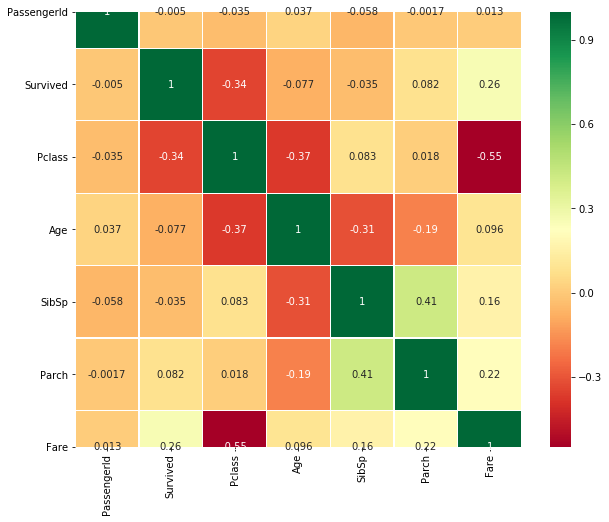

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tat = pd.read_csv("d:\\data\\train.csv")

sns.heatmap(tat.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# 숫자끼리 비교해서 상관관계를 뽑아내기 때문에, 
# "Sex"컬럼에 관련한 heatmap은 나오지 않는다. ("Sex"컬럼은 male이나 female로 문자로 나오기 때문.)

## 그림을 보고 상관관계가 있어보이는 변수들을 선택하시오!

1. Fare와 Pclass : -0.55
2. Survived 와 Pclass : -0.34
3. Age 와 Pclass : -0.37

## ■ 5장. 시각화 하기

1. R에서 시각화
    - 막대 그래프
    - 원형 그래프
    - 라인 그래프
    - 박스 그래프
    - 특수 그래프(소리를 시각화, 지도 그래프)
    
    
2. Python에서 시각화

## ■ 5.1 R에서 막대 그래프 그리기

문법 : bar(emp$sal)

## 문제57. emp 테이블의 월급으로 기본적인 막대 그래프를 그리시오!

In [ ]:
emp <- read.csv("d:\\data\\emp.csv")
str(emp) # 파일 형태를 확인할 수 있다.
emp$sal # 월급을 숫자로 확인
barplot(emp$sal) # 막대그래프로 확인

## 문제58. 위의 그래프의 제목을 Salary Bar Chart라고 이름을 붙이시오!

In [ ]:
emp <- read.csv("d:\\data\\emp.csv")
str(emp) # 파일 형태를 확인할 수 있다.
emp$sal # 월급을 숫자로 확인
barplot(emp$sal, main="Salary Bar Chart")

## 문제59. 막대 그래프의 x축에 사원 이름을 붙이시오!

In [ ]:
emp <- read.csv("d:\\data\\emp.csv")
barplot(emp$sal, main="Salary Bar Chart", names.arg = emp$ename)

## 문제60. 막대 그래프의 y축의 라벨을 salary라고 지정하시오!

In [ ]:
emp <- read.csv("d:\\data\\emp.csv")
barplot(emp$sal, main="Salary Bar Chart", names.arg = emp$ename, ylab = "Salary")

## 문제61. 막대 그래프의 색깔을 파란색으로 출력하시오!

In [ ]:
emp <- read.csv("d:\\data\\emp.csv")
barplot(emp$sal, main="Salary Bar Chart", names.arg = emp$ename, ylab = "Salary", col="blue")

### R 색상표 : https://www.stat.auckland.ac.nz/~ihaka/courses/787/R-colours-a4.pdf

## 문제62. 위의 그래프의 색깔을 파스텔톤으로 변경하시오!

In [ ]:
emp <- read.csv("d:\\data\\emp.csv")
barplot(emp$sal, main="Salary Bar Chart", names.arg = emp$ename, ylab = "Salary", col="blue", density = 50)

## 문제63. 창업건수.csv를 R로 로드하고 아래와 같이 창업건수를 막대그래프를 시각화 하시오!

### ■ 시각화를 위한 실습자료

In [ ]:
setwd("d:\\data") # 워킹 디렉토리를 지정한다.
create_cnt <- read.csv("창업건수.csv", header=T)
create_cnt
barplot(create_cnt$치킨, main="년도별 치킨집 창업건수", names.arg = create_cnt$X, col='blue', ylim = c(0,1600)) # c는 combine
# ylim 은 y축의 범위

## 문제64. 치킨집 년도별 폐업건수를  위와 같이 막대 그래프로 시각화 하시오!

In [ ]:
setwd("d:\\data") # 워킹 디렉토리를 지정한다.
create_cnt <- read.csv("폐업건수.csv", header=T)
create_cnt
barplot(create_cnt$치킨, main="년도별 치킨집 창업건수", names.arg = create_cnt$X, col='blue', ylim = c(0,5000)) 

## 문제65. 치킨집 년도별 창업건수와 폐업건수를 같이 막대그래프로 시각화하시오!

In [ ]:
setwd("d:\\data")
create_cnt <- read.csv("창업건수.csv")
drop_cnt <- read.csv("폐업건수.csv", header=T)
x <- rbind(create_cnt$치킨집, drop_cnt$치킨집)
x

barplot(x, main = "년도별 치킨집 창업, 폐업", names.arg = create_cnt$X, col=c("blue","red"), ylim = c(0,4000), beside = T) 
# beside를 씀으로써 비교되기 쉽게 만들 수 있다.

## ■ 5.2 파이썬에서 막대 그래프 그리기

__문법 :__ 데이터프레임.plot(kind = 'bar')

In [105]:
import pandas as pd

df = pd.read_excel("d:\\data\\pandas\\남북한발전전력량.xlsx")
print(df)

  전력량 (억㎾h) 발전 전력별  1990  1991  1992  1993  1994  1995  1996  1997  ...  2007  \
0        남한     합계  1077  1186  1310  1444  1650  1847  2055  2244  ...  4031   
1       NaN     수력    64    51    49    60    41    55    52    54  ...    50   
2       NaN     화력   484   573   696   803  1022  1122  1264  1420  ...  2551   
3       NaN    원자력   529   563   565   581   587   670   739   771  ...  1429   
4       NaN    신재생     -     -     -     -     -     -     -     -  ...     -   
5        북한     합계   277   263   247   221   231   230   213   193  ...   236   
6       NaN     수력   156   150   142   133   138   142   125   107  ...   133   
7       NaN     화력   121   113   105    88    93    88    88    86  ...   103   
8       NaN    원자력     -     -     -     -     -     -     -     -  ...     -   

   2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  4224  4336  4747  4969  5096  5171  5220  5281  5404  
1    56    56    65    78    77    84    78    58    66  
2  2658  2802  

## 문제66. 위의 엑셀 파일에서 컬럼은 2번째인 1990부터 끝까지 나오게 하고 행 데이터는 남한의 전력 합계 행과 북한의 전력 합계행이 아래와 같이 출력되게 하시오!( iloc를 사용해서)

In [111]:
# print(df.iloc[행번호, 열번호])

import pandas as pd
df = pd.read_excel("d:\\data\\pandas\\남북한발전전력량.xlsx")

result = df.iloc[[0,5],2:]
print(result)

   1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  2007  \
0  1077  1186  1310  1444  1650  1847  2055  2244  2153  2393  ...  4031   
5   277   263   247   221   231   230   213   193   170   186  ...   236   

   2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  4224  4336  4747  4969  5096  5171  5220  5281  5404  
5   255   235   237   211   215   221   216   190   239  

[2 rows x 27 columns]


## 문제67. 위의 결과에 앞에 행 인덱스가 아래와 같이 생성되게 하시오!

In [112]:
import pandas as pd
df = pd.read_excel("d:\\data\\pandas\\남북한발전전력량.xlsx")
df_ns = df.iloc[[0,5],2:]
df_ns.index = ['South', 'North'] # .index 기능을 이용하여 행 인덱스를 추가한다.

print(df_ns)

       1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  2007  \
South  1077  1186  1310  1444  1650  1847  2055  2244  2153  2393  ...  4031   
North   277   263   247   221   231   230   213   193   170   186  ...   236   

       2008  2009  2010  2011  2012  2013  2014  2015  2016  
South  4224  4336  4747  4969  5096  5171  5220  5281  5404  
North   255   235   237   211   215   221   216   190   239  

[2 rows x 27 columns]


## 문제68. 위의 결과를 전치 시키시오!(행과 열을 바꾸시오)

In [114]:
import pandas as pd
df = pd.read_excel("d:\\data\\pandas\\남북한발전전력량.xlsx")
df_ns = df.iloc[[0,5],2:]
df_ns.index = ['South', 'North'] # .index 기능을 이용하여 행 인덱스를 추가한다.

df_ns_t = df_ns.T

print(df_ns_t)

     South North
1990  1077   277
1991  1186   263
1992  1310   247
1993  1444   221
1994  1650   231
1995  1847   230
1996  2055   213
1997  2244   193
1998  2153   170
1999  2393   186
2000  2664   194
2001  2852   202
2002  3065   190
2003  3225   196
2004  3421   206
2005  3646   215
2006  3812   225
2007  4031   236
2008  4224   255
2009  4336   235
2010  4747   237
2011  4969   211
2012  5096   215
2013  5171   221
2014  5220   216
2015  5281   190
2016  5404   239


## 문제69. 위의 결과를 막대 그래프로 그리시오!

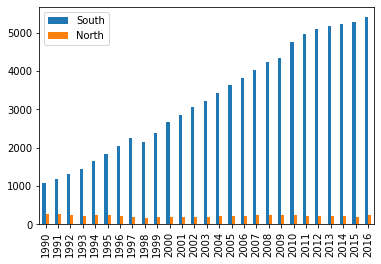

In [117]:
import pandas as pd
df = pd.read_excel("d:\\data\\pandas\\남북한발전전력량.xlsx")
df_ns = df.iloc[[0,5],2:]
df_ns.index = ['South', 'North'] # .index 기능을 이용하여 행 인덱스를 추가한다.

df_ns_t = df_ns.T

df_ns_t.plot(kind='bar')

### ※ kind 옵션 설명


| kind 옵션 |         설명         |
|:---------:|:--------------------:|
|   'line'  |       선 그래프      |
|   'bar'   |   수직 막대 그래프   |
|   'barh'  |   수평 막대 그래프   |
|   'his'   |   히스토그램 그래프  |
|   'box'   |      박스 그래프     |
|   'kde'   |   커널 밀도 그래프   |
|   'area'  |      면적 그래프     |
|   'pie'   |      파이 그래프     |
| 'scatter' |     산점도 그래프    |
|  'hexbin' | 고밀도 산점도 그래프 |

## 문제70. 타이타닉의 남자승객의 건수와 여자 승객의 건수를 막대그래프로 시각화 하시오!

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
male      577
female    314
Name: Sex, dtype: int64


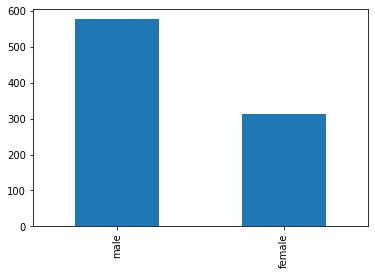

In [122]:
import pandas as pd
tat = pd.read_csv("d:\\data\\train.csv")
print(tat.columns)

sex_uniq = tat['Sex'].value_counts()

print(sex_uniq)
sex_uniq.plot(kind='bar')

## ■ 5.3 R에서 원형 그래프 그리기

__문법 :__ pie(emp$sal)

## 문제71. 사원 테이블의 월급을 원형 그래프로 그리시오!

In [ ]:
setwd("d:\\data")
emp_cnt <- read.csv("emp.csv")

pie(emp$sal, main = "Salary pie Chart", labels = emp$ename, col = rainbow(15))

## 문제72. 위의 원형 그래프를 3D로 출력하시오!

In [ ]:
# R에서 패키지를 다운로드 받는 방법.
install.packages("plotrix")
library(plotrix) # 이 세션에서 plotrix를 사용하겠다.

In [ ]:
setwd("d:\\data")
emp_cnt <- read.csv("emp.csv")
pie3D(emp$sal, explode=0.1, labels = emp$ename) # explode 값에따라 케잌조각이 더 벌어진다.

## ■ 5.4 파이썬에서 원형 그래프 그리기

__문법 :__ 데이터프레임.plot(kind='pie')

## 문제73. 타이타닉의 성별 남녀를 원형 그래프로 그리시오!

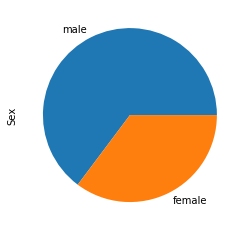

In [125]:
import pandas as pd
tat = pd.read_csv("d:\\data\\train.csv")
result = tat['Sex'].value_counts()
result.plot(kind='pie')

## 문제74. 위의 원형 그래프의 색깔을 변경하시오!

male      577
female    314
Name: Sex, dtype: int64


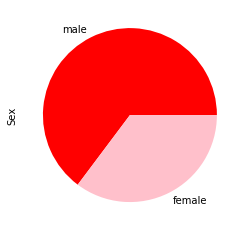

In [131]:
import pandas as pd 

tat = pd.read_csv("d:\\data\\train.csv")
print(tat['Sex'].value_counts())
t = tat['Sex'].value_counts()
t.plot(kind='pie', colors = ['red','pink'])

## 문제75. 위의 그래프에 비율이 출력 되게 하시오!

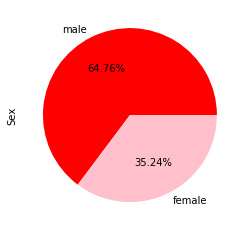

In [130]:
import pandas as pd 

tat = pd.read_csv("d:\\data\\train.csv")
t = tat['Sex'].value_counts()
t.plot(kind='pie', autopct = "%.2f%%", colors = ['red','pink']) # %.2f%% (2f --> 소숫점 2자리까지 허용하겠다.)

## 문제76. 타이타닉 데이터에서 Pclass(승선권 클래스)를 원형 그래프로 시각화 하시오!

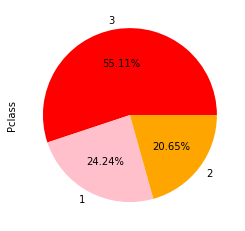

In [133]:
import pandas as pd 

tat = pd.read_csv("d:\\data\\train.csv")

t = tat['Pclass'].value_counts()
t.plot(kind = 'pie', autopct = '%.2f%%', colors = ['red', 'pink', 'orange'])

## ■ 5.5 R로 히스토그램 그래프 그리기

카페에가서 weather.csv를 내려받으시오~

In [ ]:
setwd("d:\\data")
weather <- read.csv("weather.csv")
View(weather)
summary(weather)

#### ※ 설명 : 각각의 변수(컬럼)에 대하여 최대, 최소, 평균, 중앙값을 출력하면서 데이터의 분포를 한눈에 파악할 수 있다.

## 문제77. weather.csv에서 평균기온 데이터만 가져와서 히스토그램 그래프를 그리시오!

In [ ]:
setwd("d:\\data")
weather <- read.csv("weather.csv")
ahot <- weather$평균기온
ahot
histo <- his(ahot)
histo

$breaks  (간격)  
 [1] 12 14 16 18 20 22 24 26 28 30 32 34  
 
$counts  
 [1]   1   0   4  29  26  31  62 202 101  15   1  
   
12 ~ 14 : 1건    
14 ~ 16 : 0건   
32 ~ 34 : 1건 

## 문제78. 간격(break)의 갯수를 24개로 설정해서 히스토그램 그래프를 그리시오!

In [ ]:
setwd("d:\\data")
weather <- read.csv("weather.csv")
ahot <- weather$평균기온
ahot

histo4 <- hist(ahot, breaks=24)

## 문제79. 간격(break)를 10~40 사이로 간격을 1로 해서 히스토그램 그래프를 그리시오!

In [ ]:
setwd("d:\\data")
weather <- read.csv("weather.csv")
ahot <- weather$평균기온
ahot

histo5 <- hist(ahot, breaks=seq(10,40, by=1), col = "grey", border = "white")

### ※ y축을 빈도수로 출력을 했는데 y축을 확률로 해서 확률밀도를 나타내는 히스토그램 그래프로 그릴려면 ?

__옵션 prob = T를 사용하면 된다.__(probablity =True)

In [ ]:
setwd("d:\\data")
weather <- read.csv("weather.csv")
ahot <- weather$평균기온
ahot

histo5 <- hist(ahot, breaks=seq(10,40, by=1), col = "grey", border = "white", prob=T, ylim=c(0,0.3))

## 문제80. 위의 히스토그램 그래프에 라인 그래프를 추가시키시오!

In [ ]:
setwd("d:\\data")
weather <- read.csv("weather.csv")
ahot <- weather$평균기온
ahot

histo5 <- hist(ahot, breaks= seq(10,40, by=1), col = "grey", border = "white", prob=T, ylim=c(0,0.3))
# seq(10,40, by=1)
# 10~40 까지 간격은 1로
# 10~11 // 11~12 // 12~13
lines(density(ahot), col='red')

## ■ 5.6 파이썬으로 히스토그램 그래프 그리기

__문법 :__ 데이터 프레임.plot(kind='hist')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 0: invalid start byte

이런 오류가 발생시

'textm csv'파일의 encoding 설정과 python encoding의 설정이 서로 맞지 않으면 에러가 발생한다.

한글은 보통 'utf-8'을 많이 사용하는데 


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 0: invalid start byte


이런 오류가 발생시


encoding='CP949' 로 추가해준다.

## 문제81. (오늘의 마지막 문제) 아래의 그래프를 파이썬으로 구현하시오.

In [157]:
import pandas as pd 

weather = pd.read_csv("d:\\data\\weather.csv", encoding='CP949')
print(weather)
w = weather['평균기온'].value_counts()
print(w)

     지점번호  지점          일자  평균기온  최고기온  최저기온  일강수량  평균습도
0      90  속초  2018-07-09  17.9  20.2  16.4  11.3    90
1      90  속초  2018-07-10  18.7  19.9  17.6  12.3    97
2      90  속초  2018-07-11  19.0  19.6  18.5  23.2    98
3      90  속초  2018-07-12  26.2  34.0  18.9   NaN    78
4      90  속초  2018-07-13  28.3  34.6  23.9   NaN    68
..    ...  ..         ...   ...   ...   ...   ...   ...
467   295  남해  2018-07-12  27.2  32.4  23.4   NaN    83
468   295  남해  2018-07-13  28.0  33.2  23.0   NaN    82
469   295  남해  2018-07-14  28.2  34.3  23.7   NaN    81
470   295  남해  2018-07-15  28.5  35.0  23.7   NaN    78
471   295  남해  2018-07-16  28.3  34.5  23.4   NaN    72

[472 rows x 8 columns]
27.4    19
26.7    14
27.5    14
27.9    13
27.8    12
        ..
23.3     1
31.4     1
21.1     1
24.9     1
30.2     1
Name: 평균기온, Length: 120, dtype: int64
